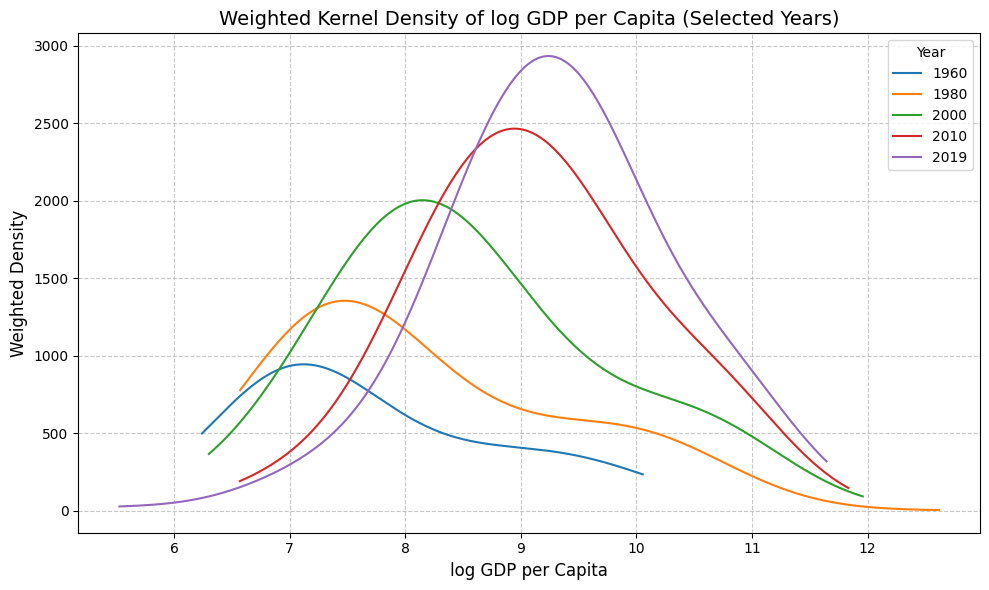

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Step 1: Load the dataset

file_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/acemoglu_growth/01_data/pwt1001.csv'
data = pd.read_csv(file_path)

# Step 2: Create log_gdp_per_capita
# Ensure no division by zero and handle invalid values
data['gdp_per_capita'] = data['rgdpo'] / data['pop']  # GDP per capita
data['log_gdp_per_capita'] = np.log(data['gdp_per_capita'].replace(0, np.nan))  # Log transformation

# Step 3: Data Cleaning
# Drop rows with NaN or infinite values in `log_gdp_per_capita` and `pop`
filtered_data = data.dropna(subset=['log_gdp_per_capita', 'pop'])
filtered_data = filtered_data[(filtered_data['log_gdp_per_capita'] != float('inf')) &
                              (filtered_data['log_gdp_per_capita'] != float('-inf'))]
# Ensure population weights are positive
filtered_data = filtered_data[filtered_data['pop'] > 0]

# Step 4: Select specific years
years_to_plot = [1960, 1980, 2000, 2010, 2019]

# Step 5: Weighted Kernel Density Estimation (KDE) and Plot
plt.figure(figsize=(10, 6))

# Loop over the selected years
for year in years_to_plot:
    if year in filtered_data['year'].unique():
        # Subset data for the current year
        subset = filtered_data[filtered_data['year'] == year]
        x = subset['log_gdp_per_capita'].values  # Variable for KDE
        weights = subset['pop'].values          # Weights for KDE
        
        # Perform KDE
        kde = gaussian_kde(x, weights=weights)
        x_grid = np.linspace(x.min(), x.max(), 500)  # Grid for density estimation
        
        # Scale the KDE by total population for better comparison
        plt.plot(x_grid, kde(x_grid) * sum(weights), label=str(year))
    else:
        print(f"Year {year} not found in the dataset.")

# Step 6: Plot Customization
plt.xlabel('log GDP per Capita', fontsize=12)
plt.ylabel('Weighted Density', fontsize=12)
plt.legend(title='Year', fontsize=10)
plt.title('Weighted Kernel Density of log GDP per Capita', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.savefig('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/acemoglu_growth/03_latex/01_graphs/fig_5.png', dpi=300)

plt.show()
